In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

import solutions

## Векторные пространства


Для начала вспомним, что вектора можно переводить из одного базиса в другой. Пусть у нас есть базисы $\{\vec{e}_i\}_{i=1}^d$ и $\{\vec{f}_i\}_{i=1}^d$.

$$
\vec{A} = \sum_{i=1}^d\alpha_i\vec{e}_i = \sum_{i=1}^d\beta_i\vec{f}_i\text{,} \\
\vec{e}_i = \sum_{j=1}^d c_{ij}\vec{f}_j\text{,} \\
\vec{A} = \sum_{i=1}^d\alpha_i\vec{e}_i =
\sum_{i=1}^d \alpha_i \sum_{j=1}^d c_{ij} \vec{f}_j =
\sum_{j=1}^d \vec{f}_j \sum_{i=1}^d \alpha_i c_{ij}\text{,} \\
\beta_j = \sum_{i=1}^d\alpha_i c_{ij}\text{,} \\
\begin{pmatrix} \beta_1 \\ \beta_2 \\ \vdots \\ \beta_d \end{pmatrix} =
\begin{pmatrix}
c_{11} & c_{21} & \cdots & c_{d1} \\
c_{12} & c_{22} & \cdots & c_{d2} \\
\vdots & \vdots & \ddots & \vdots \\
c_{1d} & c_{2d} & \cdots & c_{dd}
\end{pmatrix}
\cdot
\begin{pmatrix} \alpha_1 \\ \alpha_2 \\ \vdots \\ \alpha_d \end{pmatrix}\text{.}
$$

Обозначим матрицу перехода буквой $C$:
$$
\vec\beta = C \cdot \vec\alpha\text{.}
$$

Или если нам даны координаты нового базиса в старом:

$$
\vec{f}_i = \sum_{j=1}^d k_{ij}\vec{e}_j\text{,} \\
\begin{pmatrix}
k_{11} & k_{21} & \cdots & k_{d1} \\
k_{12} & k_{22} & \cdots & k_{d2} \\
\vdots & \vdots & \ddots & \vdots \\
k_{1d} & k_{2d} & \cdots & k_{dd}
\end{pmatrix}
\cdot
\begin{pmatrix} \beta_1 \\ \beta_2 \\ \vdots \\ \beta_d \end{pmatrix} =
\begin{pmatrix} \alpha_1 \\ \alpha_2 \\ \vdots \\ \alpha_d \end{pmatrix}\text{,} \\
K \cdot \vec\beta = \vec\alpha\text{,} \\
\vec\beta = K^{-1} \cdot \vec\alpha\text{.}
$$
То есть, $C = K^{-1}$.

Кроме того, систему координат (СК) можно параллельно переносить. Для получения координат точек в новой СК нужно вычесть из координат старой СК вектор переноса.

In [2]:
def convert(points, new_center=[[0], [0]], new_e=[[1, 0], [0, 1]]):
    """Получить координаты точек в системе координат с новым центром и новым базисом.
    
    points
        матрица, в которой столбцы - точки.
    
    new_center
        новый центр в виде вектора-столбца.
    
    new_e
        матрица, в которой строки - вектора нового базиса."""
    translated = points - new_center
    transformed = np.dot(np.linalg.inv(new_e.T), translated)
    return transformed

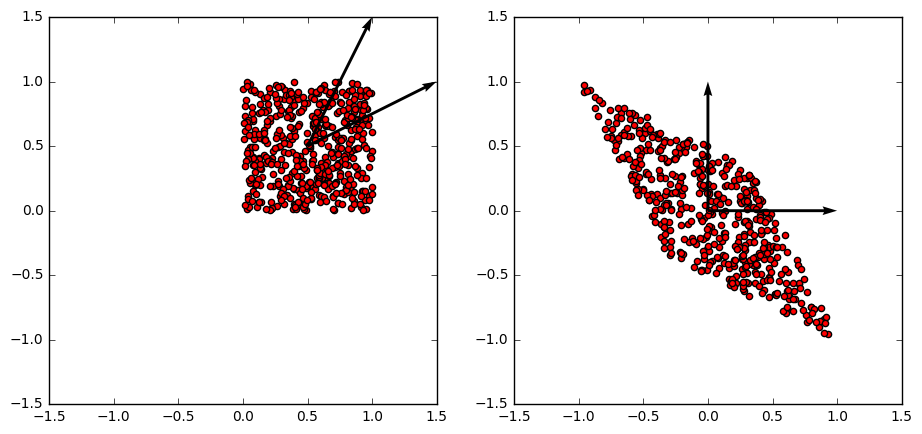

In [3]:
# Зафиксируем seed
np.random.seed(239)

# Количество точек
point_n = 500
# Сгенерируем координаты точек в старой СК
old_x = np.random.uniform(0, 1, point_n)
old_y = np.random.uniform(0, 1, point_n)
# Точки - столбцы матрицы
olds = np.array([old_x, old_y])
# Координаты центра и вектора базиса новой СК в старой
new_c = np.array([0.5, 0.5])
new_e = np.array([[1, 0.5], [0.5, 1]])
news = convert(olds, new_c[np.newaxis].T, new_e)

# Рисуем точки
f, axes = plt.subplots(1, 2, figsize=(11, 5))
max_coord = 1.5
for axis, points, c, (e1, e2) in zip(axes,
                                     [olds, news],
                                     [new_c, [0, 0]],
                                     [new_e, ([0, 1], [1, 0])]):
    axis.scatter(points[0,], points[1,], c='r')
    axis.axis([-max_coord, max_coord, -max_coord, max_coord])
    axis.quiver(c, c, e1, e2, angles='xy', scale_units='xy', scale=1)
plt.show()

## Аффинные пространства

Представим Алису и Боба на векторной плоскости. Алиса находится в точке $(0; 0)$, а Боб находится в точке $p$, и есть две точки $a$ и $b$, которые служат им в качестве ориентиров. Они могут считать вектора от своего положения до точек $a$ и $b$ базисами и обмениваться координатами других точек. Почти всегда эти координаты будут различаться. Однако, когда у кого-то из них сумма полученных координат будет равна $1$, эти координаты будут совпадать:
$$p + \lambda(a - p) + (1 - \lambda)(b - p) = \lambda a + (1 - \lambda) b\text{.}$$

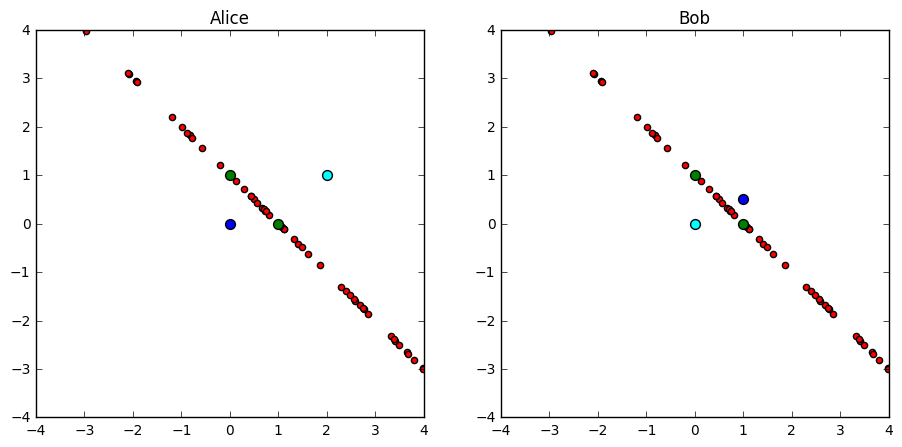

In [4]:
# На самом деле, при двух ориентирах такие комбинации будут давать точки на прямой, соединяющей ориентиры.

np.random.seed(239)

# Количество точек
point_n = 50

# Ориентиры
alice_landmarks = np.array([[1, 0], [0, 1]]).T
# Положения Алисы и Боба
alice_centers = np.array([[0, 0], [2, 1]]).T
# Точки в плоскости Алисы
alice_x = np.random.uniform(-3, 4, point_n)
alice_y = 1 - alice_x
alice_points = np.array([alice_x, alice_y])

# То же, только относительно Боба
alice_to_bob = lambda points: convert(points,
                                      alice_centers[:,1:],
                                      alice_landmarks - alice_centers.T[1])
bob_points = alice_to_bob(alice_points)
bob_centers = alice_to_bob(alice_centers)
bob_landmarks = alice_to_bob(alice_landmarks)

# Нарисуем плоскости Алисы и Боба
f, axes = plt.subplots(1, 2, figsize=(11, 5))
max_coord = 4
for title, axis, points, centers, landmarks in zip(["Alice", "Bob"],
                                                   axes,
                                                   [alice_points, bob_points],
                                                   [alice_centers, bob_centers],
                                                   [alice_landmarks, bob_landmarks]):
    axis.scatter(points[0,], points[1,], c='r')
    axis.scatter(centers[0,:1], centers[1,:1], c='b', s=50)
    axis.scatter(centers[0,1:], centers[1,1:], c='cyan', s=50)
    axis.scatter(landmarks[0,], landmarks[1,], c='g', s=50)
    axis.axis([-max_coord, max_coord, -max_coord, max_coord])
    axis.set_title(title)
plt.show()

Комбинация, в которой сумма коэффициентов равна $1$, называется **аффинной комбинацией**, или **барицентрической комбинацией**. Если Боб будет менять своё положение, но ориентироваться на одни и те же точки, то одинаковые аффинные комбинации векторов, соединяющих его положение с ориентирами, будут давать одинаковые результаты.

В векторных пространствах линейные комбинации всегда обязаны содержать вектор $(0,0)$, и, например, прямая $y=1-x$ не является подпространством $\mathbb R^2$, что довольно странно с точки зрения геометрии.
Аффинные комбинации позволяют нам избавиться от понятия начала координат, так как не важно, что принимать за точку отсчёта.

**Аффинное пространство** - это множество точек $A$, множество векторов $V$ и действие $(+) : A \times V \rightarrow A$, обладающее следующими свойствами:
- $\forall a \in A : a + 0 = a$;
- $\forall v, w \in V, a \in A : (a + v) + w = a + (v + w)$;
- Для всех $a$ из $A$ отображение $f(v) = a + v$ биективно.

Последнее свойство позволяет определить разницу двух точек аффинного пространства.

В аффинных пространствах нет начала координат, и аффинные подпространства (множества аффинных комбинаций) уже не обязаны содержать точку $(0,0)$. Например, в них $y=1-x$ является подпространством аффинного пространства над $\mathbb R^2$.

Можно ввести понятия аффинно независимых точек. Пусть $\langle A, V, (+)\rangle$ — это аффинное пространство. Множество точек $\{a_i\}_{i \in I}$ **аффинно независимо**, если для любого $i \in I$ множество $\{\overrightarrow{a_i a_j}\}_{j \in I \setminus \{i\}}$ линейно независимо.

Можно показать, что если существует хотя бы одно такое $i$, то проводя вектора от любой из точек будут получаться линейно независимые вектора.

## Ориентация

Одна из основных операций, которой мы будем пользоваться - предикат поворота, позволяющий определять относительное положение точек в пространстве.

Пусть в нашем $d$ мерном пространстве есть $d$ аффинно независимых точек $a_1, a_2, \ldots, a_d$, однозначно задающих гиперплоскость. Рассмотрим положение новой точки $p$ относительно этой гиперплоскости. Для этого рассмотрим определитель матрицы перехода в базис $\{a_i-p\}_{i=1}^d$:

$$ \det M^\mathrm T =
\begin{vmatrix}
a_1 - p \\ a_2 - p \\ \vdots \\ a_n - p
\end{vmatrix}
= \begin{vmatrix}
a_1 - p & 0 \\ a_2 - p & 0 \\ \vdots & \vdots \\ a_n - p & 0 \\ p & 1
\end{vmatrix}
= \begin{vmatrix}
a_1 & 1 \\ a_2 & 1 \\ \vdots & \vdots \\ a_n & 1 \\ p & 1
\end{vmatrix}\text{.}
$$

Заметим, что точка $p$ принадлежит гиперплоскости тогда и только тогда, когда $\det M^\mathrm T = 0$. Действительно, если $p$ лежит в гиперплоскости, то набор векторов $\{a_i-p\}_{i=1}^p$ будет линейно зависим, и определитель будет равняться нулю, и наоборот.

Теперь разделим всё пространство кроме точек плоскости на два множества в зависимости от знака определителя. Покажем, что получившиеся множества будут выпуклыми. По определению выпуклого множества надо проверить, что если точки $p_1$ и $p_2$ лежат в одной плоскости, то и все точки между ними $p_1 + \lambda \cdot \overrightarrow{p_1p_2}$, где $\lambda \in [0..1]$, тоже будут лежать в одной плоскости. Если подставить это в определитель, и вспомнить, что $1 = \lambda + (1 - \lambda)$, то получим

$$\begin{vmatrix} a_1 & 1 \\ a_2 & 1\\ \vdots & \vdots \\ a_d & 1 \\ p_1 + \lambda \cdot \overrightarrow{p_1p_2} & 1 \end{vmatrix} =  \begin{vmatrix} a_1 & 1 \\ a_2 & 1\\ \vdots & \vdots \\ a_d & 1 \\  \lambda p_2 + (1 - \lambda)p_1 & 1 \end{vmatrix} =  \lambda \begin{vmatrix} a_1 & 1 \\ a_2 & 1\\ \vdots & \vdots \\ a_d & 1 \\  p_2 & 1 \end{vmatrix} + (1 - \lambda) \begin{vmatrix} a_1 & 1 \\ a_2 & 1\\ \vdots & \vdots \\ a_d & 1 \\  p_1 & 1 \end{vmatrix}\text{.}$$

Оба определителя по предположению имеют одинаковый знак, и коэффициенты при них положительны. Значит, результат будет того же знака.

Получается, что с помощью такого определителя можно задавать полупространства и проверять положение точек относительно друг друга. Знак определителя будет отвечать за поворот. Можно условиться называть поворот "левым", если знак определителя равен $1$, и "правым" если он равен $-1$.

## Пример: проверка многоугольника на выпуклость

Для проверки многоугольника на выпуклость достаточно проверить, что повороты троек последовательных в порядке обхода вершин совпадают.

### Упражнение
Реализуйте предикат поворота самостоятельно, без использования библиотеки <code>numpy</code>. Добейтесь того, чтобы ваша функция работала так же, как функция <code>solutions.orientation</code>. Для простоты считайте, что размерность пространства не очень велика.

In [5]:
# def orientation(points, p):
#     """Возвращает ориентацию точки p относительно точек points (0, 1 или -1)."""
#     pass

orientation = solutions.orientation

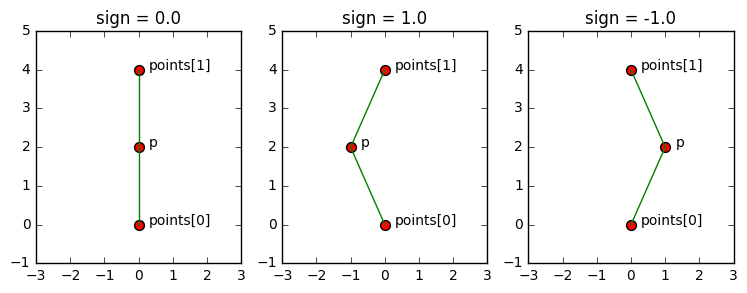

In [6]:
# Демонстрация работы на трёх тестах
tests = np.array([[[0, 0], [0, 2], [0, 4]],
                  [[0, 0], [-1, 2], [0, 4]],
                  [[0, 0], [1, 2], [0, 4]]])

f, axes = plt.subplots(1, 3, figsize=(9, 3))

for (a, p, b), axis in zip(tests, axes.reshape((3))):
    points = [a, b]
    point_array = np.array([a, p, b])
    
    axis.scatter(point_array[:,0], point_array[:,1], c='r', s=50)
    axis.plot(point_array[:,0], point_array[:,1], c='g')
    
    dx = np.array([0.3, 0])
    for i, q in zip([0, 1], points):
        axis.annotate('points[{}]'.format(i), xy=q, xytext=q + dx)
    axis.annotate('p', xy=p, xytext=p + dx)

    axis.set_title("sign = {}".format(orientation(points, p)))
    axis.axis([-3, 3, -1, 5])

plt.show()

Следующая функция принимает многоугольник, и для каждой вершины считает её поворот относительно соседних вершин. Для наглядности также рисуется многоугольник в СК, соответствующей повороту. Тесты подобраны так, что иллюстрация с $i=0$ изображает многоугольник в оригинальной системе координат.

In [7]:
# Вспомогательная функция для отрисовки, список points должен содержать 9 точек
def draw_polygon(points):
    f, axes = plt.subplots(3, 3, figsize=(10, 10))
    
    points_t = points.T
    points_cycled = np.concatenate((points_t, points[0][np.newaxis].T), axis=1)
    
    for axis, i in zip(axes.reshape((9)),
                       range(9)):
        center = points[i - 1]
        e1 = points[i] - center
        e2 = points[i - 2] - center
        
        relative_points = convert(points_cycled, center[np.newaxis].T, np.array([e1, e2]))
        turn = orientation([points[i], points[i - 2]], center)
        
        axis.scatter(relative_points[0,], relative_points[1,], c='r')
        axis.plot(relative_points[0,], relative_points[1,], c='g')
        axis.quiver([0, 0], [0, 0], [1, 0], [0, 1], angles='xy', scale_units='xy', scale=1, width=0.02)
        axis.set_title("i = {}, sign = {}".format(i - 1, turn))
    
    plt.show()

Пример для невыпуклого многоугольника.

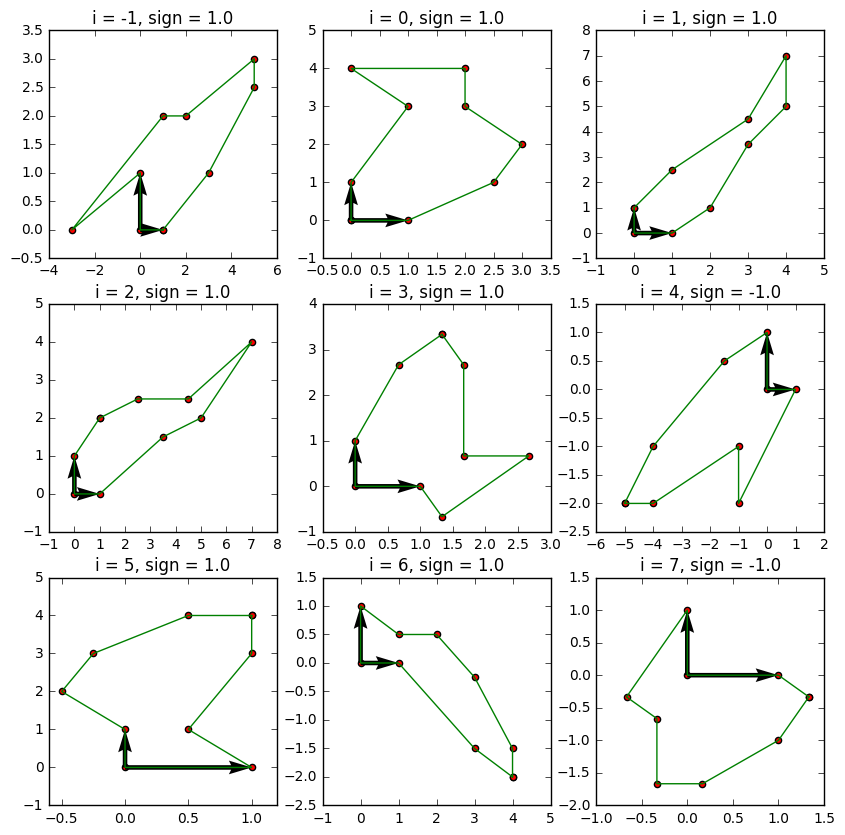

In [8]:
draw_polygon(np.array([
        [0, 0],
        [1, 0],
        [2.5, 1],
        [3, 2],
        [2, 3],
        [2, 4],
        [0, 4],
        [1, 3],
        [0, 1]]))

Пример для выпуклого многоугольника.

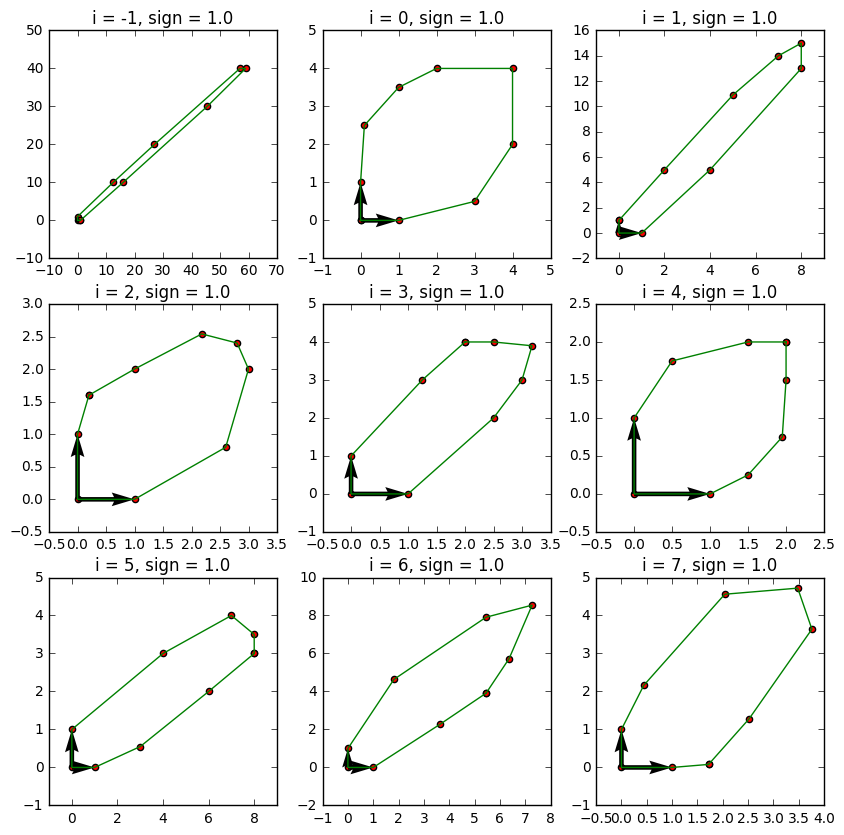

In [9]:
draw_polygon(np.array([
        [0, 0],
        [1, 0],
        [3, 0.5],
        [4, 2],
        [4, 4],
        [2, 4],
        [1, 3.5],
        [0.1, 2.5],
        [0, 1]]))

## Предикат "левый поворот" на плоскости

Рассмотрим результат наивного вычисления поворота от отрезка и точки плоскости:

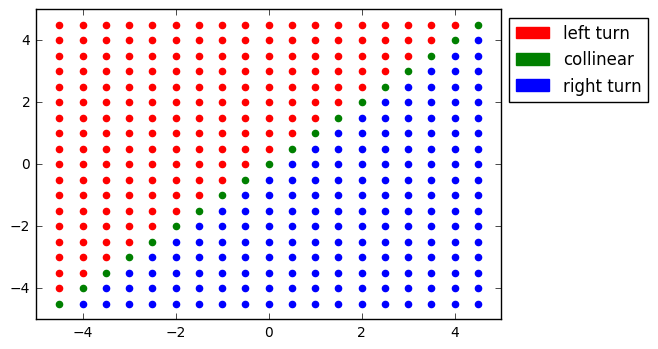

In [34]:
class Point:
    def __init__(self, x = 0.0, y = 0.0):
        self.x = x
        self.y = y

    def __add__(self, p):
        return Point(self.x + p.x, self.y + p.y)

    def __sub__(self, p):
        return Point(self.x - p.x, self.y - p.y)

    def __neg__(self):
        return Point(-self.x, -self.y)

    def __repr__(self):
        return "(%r, %r)" % (self.x, self.y)

max_val = 5
step = 0.5
colors = ["r","g", "b"]

def calculate_det(a, b):
    return a.x * b.y - b.x * a.y

def turn(a, b, c):
    det = calculate_det(b - a, c - a)
    if det > 0:
        return colors[0]
    if det < 0:
        return colors[2]
    return colors[1]

x = Point(-max_val, -max_val)
y = Point(max_val, max_val)
for x_i in np.arange(-max_val + step, max_val, step):
    for y_i in np.arange(-max_val + step, max_val, step):
        color = turn(x, y, Point(x_i, y_i))
        plt.scatter(x_i, y_i, color = color, s = 20)

plt.axis([-max_val, max_val, -max_val, max_val])
plt.legend(handles=[mpatches.Patch(color='r', label='left turn'), 
                    mpatches.Patch(color='g', label='collinear'),
                    mpatches.Patch(color='b', label='right turn')], 
           bbox_to_anchor=(1, 1), loc=2)
plt.show()

У такого решения есть проблема: попробуем посчитать поворот точек $p_1 = (1.1016, 8.1672)$, $p_2 = -p_1$ и $p_3 = p_1 \cdot (1 << 52)$:

In [36]:
p1 = Point(1.1016, 8.1672)
p2 = -p1
p3 = Point(p1.x * (1 << 52), p1.y * (1 << 52))
print("Points:", p1, p2, p3)
t = turn(p1, p2, p3)
print("Turn:", ("left turn" if t == "r" else ("collinear" if t == "g" else "right turn")))

Points: (1.1016, 8.1672) (-1.1016, -8.1672) (4961165349511338.0, 3.678179887666031e+16)
Turn: left turn


Несмотря на то, что точки лежат на одной прямой, результат не равен $collinear$. Проблема кроется в ограниченной точности арифметики с плавающей точкой. Достаточно часто реализацию алгоритмов вычислительной геометрии затрудняют такие вычисления, так как их погрешность приводит к нарушению инвариантов алгоритма. 

Но заметим, что $collinear$ - достаточно редкий результат. Поэтому если бы мы могли большую часть ответов выдавать, сравнивая векторное произведение с некоторой константой $e$, а оставшуюся часть считать каким-нибудь менее эффективным, но точным способом (например, воспользовавшись длинной арифметикой), то мы могли бы считать нашу задачу выполненной, так как в среднем время расчета поворота увеличилось бы незначительно. Поэтому наша следующая задача - вычислить константу $e$.

Двоичное число с плавающей точкой представляется в виде $a = \pm 1.a_1a_2a_3 \dots a_{p - 1} \times 2^\gamma$, где $a_i \in \{ 0, 1 \}$. Обозначим за $D$ множество всех чисел c плавающей точкой, операции над ними (в противовес обычным операциям над вещественными числами) обычно обозначают как $\oplus$, $\ominus$ и $\otimes$. Машинный эпсилон $\varepsilon = 2^{-p}$. Тогда погрешности операций для $\forall a, b \in D$ при условии округления к ближайшему можно выразить так:
* $\bigl(a \oplus b\bigr) = \bigl(a + b\bigr) \cdot \bigl(1 + \delta\bigr)$, $\bigl|\   \delta\  \bigr| \leqslant \varepsilon$
* $\bigl(a \ominus b\bigr) = \bigl(a - b\bigr) \cdot \bigl(1 + \delta\bigr)$, $\bigl|\   \delta\  \bigr| \leqslant \varepsilon$
* $\bigl(a \otimes b\bigr) = \bigl(a \times b\bigr) \cdot \bigl(1 + \delta\bigr)$, $\bigl|\  \delta\  \bigr| \leqslant \varepsilon$

Нам нужно показать, что справедливо следующее утверждение:

$$ \forall a, b, c \in D^2, \widetilde{v} = \bigl(b_x \ominus a_x\bigr) \otimes \bigl(c_y \ominus a_y\bigr) \ominus \bigl(b_y \ominus a_y\bigr) \otimes \bigl(c_x \ominus a_x\bigr) $$ 
$$ \begin{equation*}
\exists e \in D :
 \begin{cases}
   \widetilde{v} > e &{\Rightarrow \bigl(b - a\bigr) \times \bigl(c - a\bigr) > 0}\\
   \widetilde{v} < -e &{\Rightarrow \bigl(b - a\bigr) \times \bigl(c - a\bigr) < 0}
 \end{cases}
\end{equation*} $$

Обозначим $v = \bigl(b - a\bigr) \times \bigl(c - a\bigr) = \bigl(b_x - a_x\bigr) \bigl(c_y - a_y\bigr) - \bigl(b_y - a_y\bigr) \bigl(c_x - a_x\bigr)$. Распишем выражение для $\widetilde{v}$ в арифметике с плавающей точкой: 

$$ \begin{align}
\widetilde{v} 
&= \bigl(b_x \ominus a_x\bigr) \otimes \bigl(c_y \ominus a_y \bigr) \ominus \bigl(b_y \ominus a_y \bigr) \otimes \bigl(c_x \ominus a_x\bigr) = \\
&= \bigl[ \bigl(b_x - a_x\bigr) \bigl(c_y - a_y\bigr) \bigl(1 + \delta_1\bigr) \bigl(1 + \delta_2\bigr) \bigl(1 + \delta_3\bigr) - \bigl(b_y - a_y\bigr) \bigl(c_x - a_x\bigr) \bigl(1 + \delta_4\bigr) \bigl(1 + \delta_5\bigr) \bigl(1 + \delta_6 \bigr) \bigr] \bigl(1 + \delta_7\bigr),
\end{align}
$$

где $\bigl|\  \delta_i \bigr|\  \leqslant \varepsilon.$ Заметим, что $v \approx \widetilde{v}$. Оценим абсолютную погрешность $\bigl|\ v - \widetilde{v}\bigr|\  $.

$$ \begin{align}
\bigl|v - \widetilde{v}\bigr|
&= \bigl|\bigl(b_x - a_x\bigr) \bigl(c_y - a_y\bigr) - \bigl(b_y - a_y\bigr) \bigl(c_x - a_x\bigr) - \bigl(b_x - a_x\bigr) \bigl(c_y - a_y\bigr) \bigl(1 + \delta_1\bigr) \bigl(1 + \delta_2\bigr) \bigl(1 + \delta_3\bigr) \bigl(1 + \delta_7\bigr) + \bigr. \\ &\phantom{=\ }\bigl. + \bigl(b_y - a_y\bigr) \bigl(c_x - a_x\bigr) \bigl(1 + \delta_4\bigr) \bigl(1 + \delta_5\bigr) \bigl(1 + \delta_6\bigr) \bigl(1 + \delta_7\bigr)\bigr| =  \\
&= \bigl|\bigl(b_x - a_x\bigr) \bigl(c_y - a_y\bigr) \bigl(1 - \bigl(1 + \delta_1\bigr) \bigl(1 + \delta_2\bigr) \bigl(1 + \delta_3\bigr) \bigl(1 + \delta_7\bigr)\bigr) - \bigl(b_y - a_y\bigr) \bigl(c_x - a_x\bigr) \bigl(1 - \bigl(1 + \delta_4\bigr) \bigl(1 + \delta_5\bigr) \bigl(1 + \delta_6\bigr) \bigl(1 + \delta_7\bigr)\bigr)\bigr| \leqslant \\ 
&\leqslant \bigl|\bigl(b_x - a_x\bigr) \bigl(c_y - a_y\bigr) \bigl(1 - \bigl(1 + \delta_1\bigr) \bigl(1 + \delta_2\bigr) \bigl(1 + \delta_3\bigr) \bigl(1 + \delta_7\bigr)\bigr)\bigr| + \bigl|\bigl(b_y - a_y\bigr) \bigl(c_x - a_x\bigr) \bigl(1 - \bigl(1 + \delta_4\bigr) \bigl(1 + \delta_5\bigr) \bigl(1 + \delta_6\bigr) \bigl(1 + \delta_7\bigr)\bigr)\bigr| = \\ 
&= \bigl|\bigl(b_x - a_x\bigr) \bigl(c_y - a_y\bigr)\bigr| \cdot \bigl|\bigl(\bigl(1 + \delta_1\bigr) \bigl(1 + \delta_2\bigr) \bigl(1 + \delta_3\bigr) \bigl(1 + \delta_7\bigr) - 1\bigr)\bigr| + \bigl|\bigl(b_y - a_y\bigr) \bigl(c_x - a_x\bigr)\bigr| \cdot \bigl|\bigl(\bigl(1 + \delta_4\bigr) \bigl(1 + \delta_5\bigr) \bigl(1 + \delta_6\bigr) \bigl(1 + \delta_7\bigr) - 1\bigr)\bigr| = \\ 
&= \bigl|\bigl(b_x - a_x\bigr) \bigl(c_y - a_y\bigr)\bigr| \cdot \bigl|\delta_1 + \delta_2 + \delta_3 + \delta_7 + \delta_1 \delta_2 +\ldots\bigr| + \bigl|\bigl(b_y - a_y\bigr) \bigl(c_x - a_x\bigr)\bigr| \cdot \bigl|\delta_4 + \delta_5 + \delta_6 + \delta_7 + \delta_4 \delta_5 +\ldots\bigr| \leqslant \\ 
&\leqslant \bigl|\bigl(b_x - a_x\bigr) \bigl(c_y - a_y\bigr)\bigr| \cdot \bigl(\bigl|\delta_1\bigr| + \bigl|\delta_2\bigr| + \bigl|\delta_3\bigr| + \bigl|\delta_7\bigr| + \bigl|\delta_1 \delta_2\bigr| +\ldots\bigr) + \bigl|\bigl(b_y - a_y\bigr) \bigl(c_x - a_x\bigr)\bigr| \cdot \bigl(\bigl|\delta_4\bigr| + \bigl|\delta_5\bigr| + \bigl|\delta_6\bigr| + \bigl|\delta_7\bigr| + \bigl|\delta_4 \delta_5\bigr| +\ldots\bigr) \leqslant \\
&\leqslant \bigl|\bigl(b_x - a_x\bigr) \bigl(c_y - a_y\bigr)\bigr| \cdot \bigl(4 \varepsilon + 6 \varepsilon^2 + 4 \varepsilon^3 + \varepsilon^4\bigr) + \bigl|\bigl(b_y - a_y\bigr) \bigl(c_x - a_x\bigr)\bigr| \cdot \bigl(4 \varepsilon + 6 \varepsilon^2 + 4 \varepsilon^3 + \varepsilon^4\bigr) = \\ 
&= \bigl(\bigl|\bigl(b_x - a_x\bigr) \bigl(c_y - a_y\bigr)\bigr| + \bigl|\bigl(b_y - a_y\bigr) \bigl(c_x - a_x\bigr)\bigr|\bigr)\bigl(4 \varepsilon + 6 \varepsilon^2 + 4 \varepsilon^3 + \varepsilon^4\bigr)
\end{align}
$$

Заметим, что $e$ должна удовлетворять неравенству $\bigl|\ \widetilde{v} - v\bigr|\  \leqslant e \leqslant \bigl|\ \widetilde{v}\bigr|\ $. Таким образом, мы получили нижнюю границу числа $e$ в вещественных числах, но $e$ является числом с плавающей точкой. Обозначим $t = \bigl|\ \bigl(b_x - a_x\bigr) \bigl(c_y - a_y\bigr)\bigr|\  + \bigl|\ \bigl(b_y - a_y\bigr) \bigl(c_x - a_x\bigr)\bigr|\ $. Тогда $\bigl|\ v - \widetilde{v}\bigr|\  \leqslant t \cdot \bigl(4 \varepsilon + 6 \varepsilon^2 + 4 \varepsilon^3 + \varepsilon^4\bigr)$. Пусть $\widetilde{t} = \bigl|\ \bigl(b_x \ominus a_x\bigr) \otimes \bigl(c_y \ominus a_y\bigr)\bigr|\  \oplus \bigl|\ \bigl(b_y \ominus a_y\bigr) \otimes \bigl(c_x \ominus a_x\bigr)\bigr|\ $. Распишем:

$$ \begin{array}{c} 
\widetilde{t} = [\bigl|\ (b_x - a_x) (c_y - a_y) (1 + \delta_1) (1 + \delta_2) (1 + \delta_3)\bigr|\  + \bigl|\ (b_y - a_y) (c_x - a_x) (1 + \delta_4) (1 + \delta_5) (1 + \delta_6)\bigr|\ ] (1 + \delta_7) \geqslant \\
\geqslant \bigl|\ (b_x - a_x) (c_y - a_y) (1 - \varepsilon)^3)\bigr|\  \cdot (1 - \varepsilon) + \bigl|\ (b_y - a_y) (c_x - a_x) (1 - \varepsilon)^3)\bigr|\  \cdot (1 - \varepsilon) = \\
= \bigl|\ (b_x - a_x) (c_y - a_y)\bigr|\  \cdot (1 - \varepsilon)^4 + |(b_y - a_y) (c_x - a_x)| \cdot (1 - \varepsilon)^4 = \\
= (\bigl|\ (b_x - a_x) (c_y - a_y)\bigr|\  + \bigl|\ (b_y - a_y) (c_x - a_x)\bigr|\ ) \cdot (1 - \varepsilon)^4 = t \cdot (1 - \varepsilon)^4
\end{array}
$$

Получили, что $t \leqslant \Large \frac{\widetilde{t}}{(1 - \varepsilon)^4}$. Отсюда следует:
$$ \begin{array}{c} 
\bigl|\ v - \widetilde{v}\bigr|\  \leqslant e \leqslant \widetilde{t} \times \Large \frac{4 \varepsilon + 6 \varepsilon^2 + 4 \varepsilon^3 + \varepsilon^4}{\bigl(1 - \varepsilon\bigr)^4} = \\ = \widetilde{t} \times \bigl(4 \varepsilon + 6 \varepsilon^2 + 4 \varepsilon^3 + \varepsilon^4\bigr) \times \bigl(1 + 4 \varepsilon + 10 \varepsilon^2 + 20 \varepsilon^3 + O\bigl(\varepsilon^4\bigr)\bigr) \leqslant \bigl(\bigl|\ \bigl(b_x \ominus a_x\bigr) \otimes \bigl(c_y \ominus a_y\bigr)\bigr|\  \oplus \bigl|\ \bigl(b_y \ominus a_y\bigr) \otimes \bigl(c_x \ominus a_x)\bigr|\ \bigr) \times 8 \varepsilon 
\end{array}
$$

Таким образом, константа $e$ может быть вычислена следующим образом: 

$$ e = \bigl(\bigl|\ \bigl(b_x \ominus a_x\bigr) \otimes \bigl(c_y \ominus a_y\bigr)\bigr|\  \oplus \bigl|\ \bigl(b_y \ominus a_y\bigr) \otimes \bigl(c_x \ominus a_x\bigr)\bigr|\ \bigr) \times 8 \varepsilon $$

С учетом полученных результатов, предикат будет выглядеть так:

In [37]:
from decimal import *

getcontext().prec = 70

def calculate_arg(a, b):
    return abs(a.x * b.y) + abs(b.x * a.y)

def turn(a, b, c):
    e = 8 * np.finfo(float).eps * calculate_arg(b - a, c - a)
    det = calculate_det(b - a, c - a)
    if det > e:
        return colors[0]
    if det < -e:
        return colors[2]

    la = Point(Decimal(a.x), Decimal(a.y))
    lb = Point(Decimal(b.x), Decimal(b.y))
    lc = Point(Decimal(c.x), Decimal(c.y))
    ldet = calculate_det(lb - la, lc - la)
    if ldet > 0:
        return colors[0]
    if ldet < 0:
        return colors[2]
    return colors[1]

Если мы посчитаем поворот точек $p_1$, $p_2$ и $p_3$ теперь, то получим верный результат:

In [38]:
p1 = Point(1.1016, 8.1672)
p2 = -p1
p3 = Point(p1.x * (1 << 52), p1.y * (1 << 52))
print("Points:", p1, p2, p3)
t = turn(p1, p2, p3)
print("Turn:", ("left turn" if t == "r" else ("collinear" if t == "g" else "right turn")))

Points: (1.1016, 8.1672) (-1.1016, -8.1672) (4961165349511338.0, 3.678179887666031e+16)
Turn: collinear


## Пересечение отрезков

С помощью предиката поворота можно проверять, пересекаются ли два отрезка. Ясно, что отрезки пересекаются тогда и только тогда, когда для каждого из отрезков его точки не лежат с одной стороны от второго отрезка, это проверяется предикатом поворота.

<img src="intersection_cases.png">

Отдельно следует рассмотреть случай, когда отрезки находятся на одной прямой. В таком случае все повороты в вышеописанной проверке будут равны нулю, и нужно сделать дополнительные проверки отрезков на наложение. Отрезки будут пересекаться, если будут пересекаться их проекции на ось $x$ и на ось $y$.

<img src="bounding_box.png">

### Упражнение
Реализуйте проверку пересечения отрезков самостоятельно. Добейтесь того, чтобы ваша функция работала так же, как функция <code>solutions.do_intersect</code>.

In [10]:
# def do_intersect(a, b, c, d):
#     """Возвращает True, если отрезки ab и cd пересекаются."""
#     pass

do_intersect = solutions.do_intersect

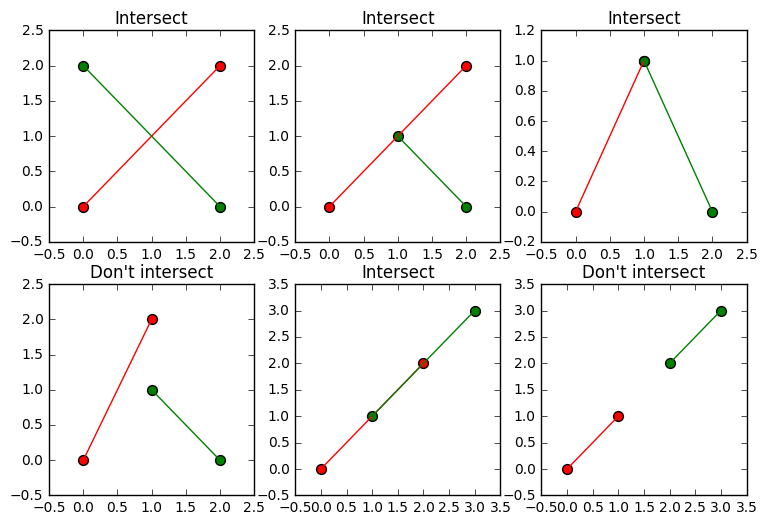

In [11]:
tests = [[[0, 0], [2, 2], [2, 0], [0, 2]],
         [[0, 0], [2, 2], [2, 0], [1, 1]],
         [[0, 0], [1, 1], [2, 0], [1, 1]],
         [[0, 0], [1, 2], [2, 0], [1, 1]],
         [[0, 0], [2, 2], [1, 1], [3, 3]],
         [[0, 0], [1, 1], [2, 2], [3, 3]]]

f, axes = plt.subplots(2, 3, figsize=(9, 6))

for (a, b, c, d), axis in zip(tests, axes.reshape((6))):
    ab = np.array([a, b]).T
    cd = np.array([c, d]).T
    for segment, color in [(ab, 'r'), (cd, 'g')]:
        axis.scatter(segment[0,], segment[1,], c=color, s=50)
        axis.plot(segment[0,], segment[1,], c=color)
    axis.set_title("Intersect" if do_intersect(a, b, c, d) else "Don't intersect")

plt.show()

## Объём

Объём — это сопоставляемая фигуре численная характеристика, такая, что:
- У одинаковых фигур равные объёмы (объём не меняется при движении фигуры как твердого целого);
- Если одна фигура состоит из двух, то её объём равен сумме объёмов её частей.

За единицу объёма принимается объём n-мерного куба с ребром, равным единице. Объём произвольного тела определяется как интеграл 
$$
\displaystyle \idotsint\limits_{\mathbb{R}^n}\chi(x_1, \dots, x_n)\mathrm dx_1\dots \mathrm dx_n\text{,}
$$
где $\chi(x_1, \dots, x_n)$ — характеристическая функция геометрического образа тела,
то есть такая функция,
что $\chi(x_1, \dots, x_n) = 1$, если точка $\left(x_1,\dots,x_n\right)$ принадлежит фигуре,
и $\chi(x_1, \dots, x_n) = 0$ в обратном случае.

#### Теорема
Пусть даны две n-мерные области:
$(D)$ в пространстве $x_1 x_2\dots x_n$ и $(\Delta)$ в пространстве $\xi_1\xi_2\dots\xi_n$,
ограниченные каждая одной непрерывной — гладкой или кусочно-гладкой — поверхностью.
Между ними с помощью формул
$$
\begin{cases}
x_1 = x_1(\xi_1,\xi_2,\dots,\xi_n); \\
x_2 = x_2(\xi_1,\xi_2,\dots,\xi_n); \\
\dots \\
x_n = x_n(\xi_1,\xi_2,\dots,\xi_n); 
\end{cases}
$$
устанавливается взаимно однозначное соответствие.
Тогда, при обычных предположениях относительно производных
и сохранения знака якобианом
$$
J =
\begin{vmatrix}
\dfrac{\partial x_1}{\partial \xi_1} & \dfrac{\partial x_2}{\partial \xi_1} & \cdots & \dfrac{\partial x_n}{\partial \xi_1}  \\
\dfrac{\partial x_1}{\partial \xi_2} & \dfrac{\partial x_2}{\partial \xi_2} & \cdots &\dfrac{\partial x_n}{\partial \xi_2}  \\
\vdots & \vdots & \ddots & \vdots \\
\dfrac{\partial x_1}{\partial \xi_n} & \dfrac{\partial x_2}{\partial \xi_n} & \cdots &\dfrac{\partial x_n}{\partial \xi_n} \end{vmatrix}\text{,}
$$
интеграл от непрерывной в $(D)$ функции $f(x_1, x_2, \dots, x_n)$
может быть преобразован по формуле
$$
\displaystyle \idotsint\limits_{(D)}f(x_1, \dots, x_n)\mathrm dx_1\dots \mathrm dx_n =
\idotsint\limits_{(\Delta)}f(x_1(\xi_1,\xi_2,\dots,\xi_n), \dots, x_n(\xi_1,\xi_2,\dots,\xi_n))
|J|\mathrm d\xi_1\dots \mathrm d\xi_n\text{.}
$$

### Пример

Пусть параллелепипед задаётся точкой $p$ и ЛНЗ векторами $\{\vec{a_i}\}_{i=0}^n$,
$\chi(x_1, \dots, x_n)$ — его характеристическая функция.
Для вычисления объёма сначала сместим начало системы координат в точку $p$,
а затем заменим базис на $\{\vec{a_i}\}_{i=0}^n$.
В новой системе координат параллелепипед будет областью $\left[0,1\right]^n$.
$$
\displaystyle
x_i = \sum_{j=1}^n (a_j - p)_i \xi_j \text{,}\\
\frac{\partial x_i}{\partial \xi_j} = (a_j - p)_i \text{,}\\
J = \begin{vmatrix}
(a_1 - p)_1 & (a_1 - p)_2 & \cdots & (a_1 - p)_n\\
(a_2 - p)_1 & (a_2 - p)_2 & \cdots &(a_2 - p)_n\\
\vdots & \vdots & \ddots & \vdots\\
(a_n - p)_1 & (a_n - p)_2 & \cdots &(a_n - p)_n
\end{vmatrix}
= \begin{vmatrix}
a_1 - p \\ a_2 - p\\
\vdots \\
a_n - p
\end{vmatrix}
= \begin{vmatrix}
a_1 & 1 \\
a_2 & 1 \\
\vdots & \vdots \\
a_n & 1 \\
p & 1
\end{vmatrix} \text{,}\\
\idotsint\limits_{\mathbb{R}^n}\chi(x_1, \dots, x_n)\mathrm dx_1\dots \mathrm dx_n =
\idotsint\limits_{\left[0,1\right]^n}\left|J\right|\mathrm d\xi_1 \dots \mathrm d\xi_n = \left|J\right|\text{.}
$$

### Упражнение
Посчитайте объём множества $\left\{\left(x_1,\ldots,x_n\right) \mid \forall i : x_i \geq 0, \sum_{i=1}^n x_i \leq a\right\}$ в общем случае для любых $n$ и $a$. Оно задаёт $n$-мерный симплекс. При $n=2$ это будет треугольник, при $n=3$ — тетраэдр и так далее.

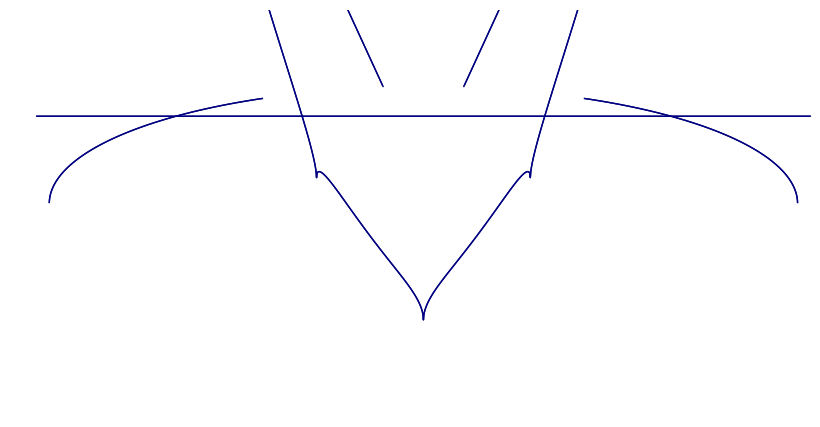

In [12]:
def volume(a, n):
    return 1 # Впишите ответ

# Запустите для проверки ответа
plt.figure(figsize=(10, 5))
plt.axis('off')
solutions.batman(plt, volume)

## Однородные координаты

Однородные координаты — это альтернативный способ представления точек пространства. Для представления точек на плоскости будем рассматривать точки $P(x, y, z) \in \mathbb R^3$. Если $P \neq (0, 0, 0)$, то через $P$ и $(0, 0, 0)$ можно провести прямую. Если $z \neq 0$, то такая прямая будет пересекать плоскость $z = 1$ в некой точке $(x_0, y_0, 1)$. В таком случае будем говорить, что $(x, y, z)$ — однородные координаты точки $(x_0, y_0)$. Понятно, что точки $(x, y, z)$ и $(\lambda x, \lambda y, \lambda z)$ задают одинаковые прямые и одинаковые точки на плоскости. Из этого понятно, что $x_0 = x/z$ и $y_0 = y / z$. Если $P=(x, y, 0)$, то будем считать, что $P$ задаёт бесконечную точку. Точку $(0, 0, 0)$ рассматривать не будем.

<img src="homogeneous.png">

### Уравнения прямой и поворот

Пусть у нас есть две точки на плоскости. Если провести через них прямую, то она разделит плоскость на две полуплоскости. Посмотрим, чему будет соответствовать эта прямая в однородных координатах. Если через каждую точку этой прямой провести прямую к $(0, 0, 0)$, то получится плоскость, проходящая через $A$, $B$ и $(0, 0, 0)$. Получаем уравнение прямой в однородных координатах:

$$\displaystyle
\begin{vmatrix}
A_x & A_y & A_z & 1 \\
B_x & B_y & B_z & 1 \\
0 & 0 & 0 & 1 \\
x & y & z & 1
\end{vmatrix} = 0 \text{,} \\ \ \\
\begin{vmatrix}
A_x & A_y & A_z \\
B_x & B_y & B_z \\
x & y & z
\end{vmatrix} = 0\text{.}
$$

Аналогично, знак этого определителя будет являться поворотом для точек $A$, $B$ и $(x, y, z)$.

### Пересечение прямых

Заметим, что
$$
\begin{vmatrix}
A_x & A_y & A_z \\
B_x & B_y & B_z \\
x & y & z
\end{vmatrix} =
(x, y, z) \cdot \left(A \times B\right) \text{.}
$$

Из курса аналитической геометрии известно, что $A \times B$ это нормаль к плоскости. Это нам поможет, если мы захотим пересечь две прямые.

Пусть прямые заданы парами точек $(A, B)$ и $(C, D)$. Им соответствуют уравнения плоскостей $(x, y, z) \cdot (A \times B)=0$ и $(x, y, z) \cdot (C \times D)=0$. Их пересечение — это прямая. Поскольку эта прямая лежит в каждой из плоскостей, она должна быть перпендикулярна нормалям обоих плоскостей. Мы знаем, что векторное произведение заданных векторов перпендикулярно каждому из них. Значит, векторное произведение нормалей $N = (A \times B) \times (C \times D)$ будет сонаправленно с прямой их пересечения. Поскольку точка $(0, 0, 0)$ принадлежит каждой из плоскостей, то и линия их пересечения будет её содержать. Отсюда вытекает параметрическая формула прямой пересечения: $(x, y, z) = \lambda \cdot N, \lambda \in \mathbb R$.

Теперь поймём, какой точке плоскости соответствует эта прямая. Если она не параллельна прямой $z=1$, то она будет пересекать её при каком-то значении параметра $\lambda$. Но поскольку домножение на константу не меняет точки в однородных координатах, можно сказать, что $N$ — точка пересечения прямых.

Если же полученная прямая будет параллельна $z=1$, то вектор $N$ будет задавать бесконечную точку, которая будет сонаправленна с исходными прямыми.

### Упражнение

Рассмотрим матрицу

$$
A = \begin{pmatrix}
1 & 0 & a \\
0 & 1 & b \\
0 & 0 & 1
\end{pmatrix} \text{.}
$$

Пусть $X = (x, y, z)$ — однородные координаты какой-то точки. Чему будет соответствовать произведение $A \cdot X^\mathrm T$? Чему будет соответствовать это же произведение, если

$$
A = \begin{pmatrix}
a & b & c \\
d & e & f \\
0 & 0 & 1
\end{pmatrix} \text{?}
$$

Сравните это с выражениями из первого раздела.